# Import

In [1]:
from imports import *

# 1

In [2]:
df=data('tips')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


## a

In [4]:
df['price_per_person'] = df.total_bill/df['size']


In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


## b

Top 2 feature guesses:

1) total_bill
2) price_per_person

## c

In [6]:
dummy_list=[
	'sex',
	'smoker',
	'day',
	'time'
]

In [7]:
dummy_df=pd.get_dummies(df[dummy_list], dummy_na=False, drop_first=True)

In [8]:
df=pd.concat([df, dummy_df], axis=1)

In [9]:
df=df.drop(dummy_list,axis=1)

In [10]:
columns_to_scale = ['total_bill','price_per_person','tip']

In [11]:
scaler = MinMaxScaler()

In [12]:
scaler.fit(df[columns_to_scale])

MinMaxScaler()

In [13]:
# munging 😬
df[columns_to_scale] = scaler.transform(df[columns_to_scale])

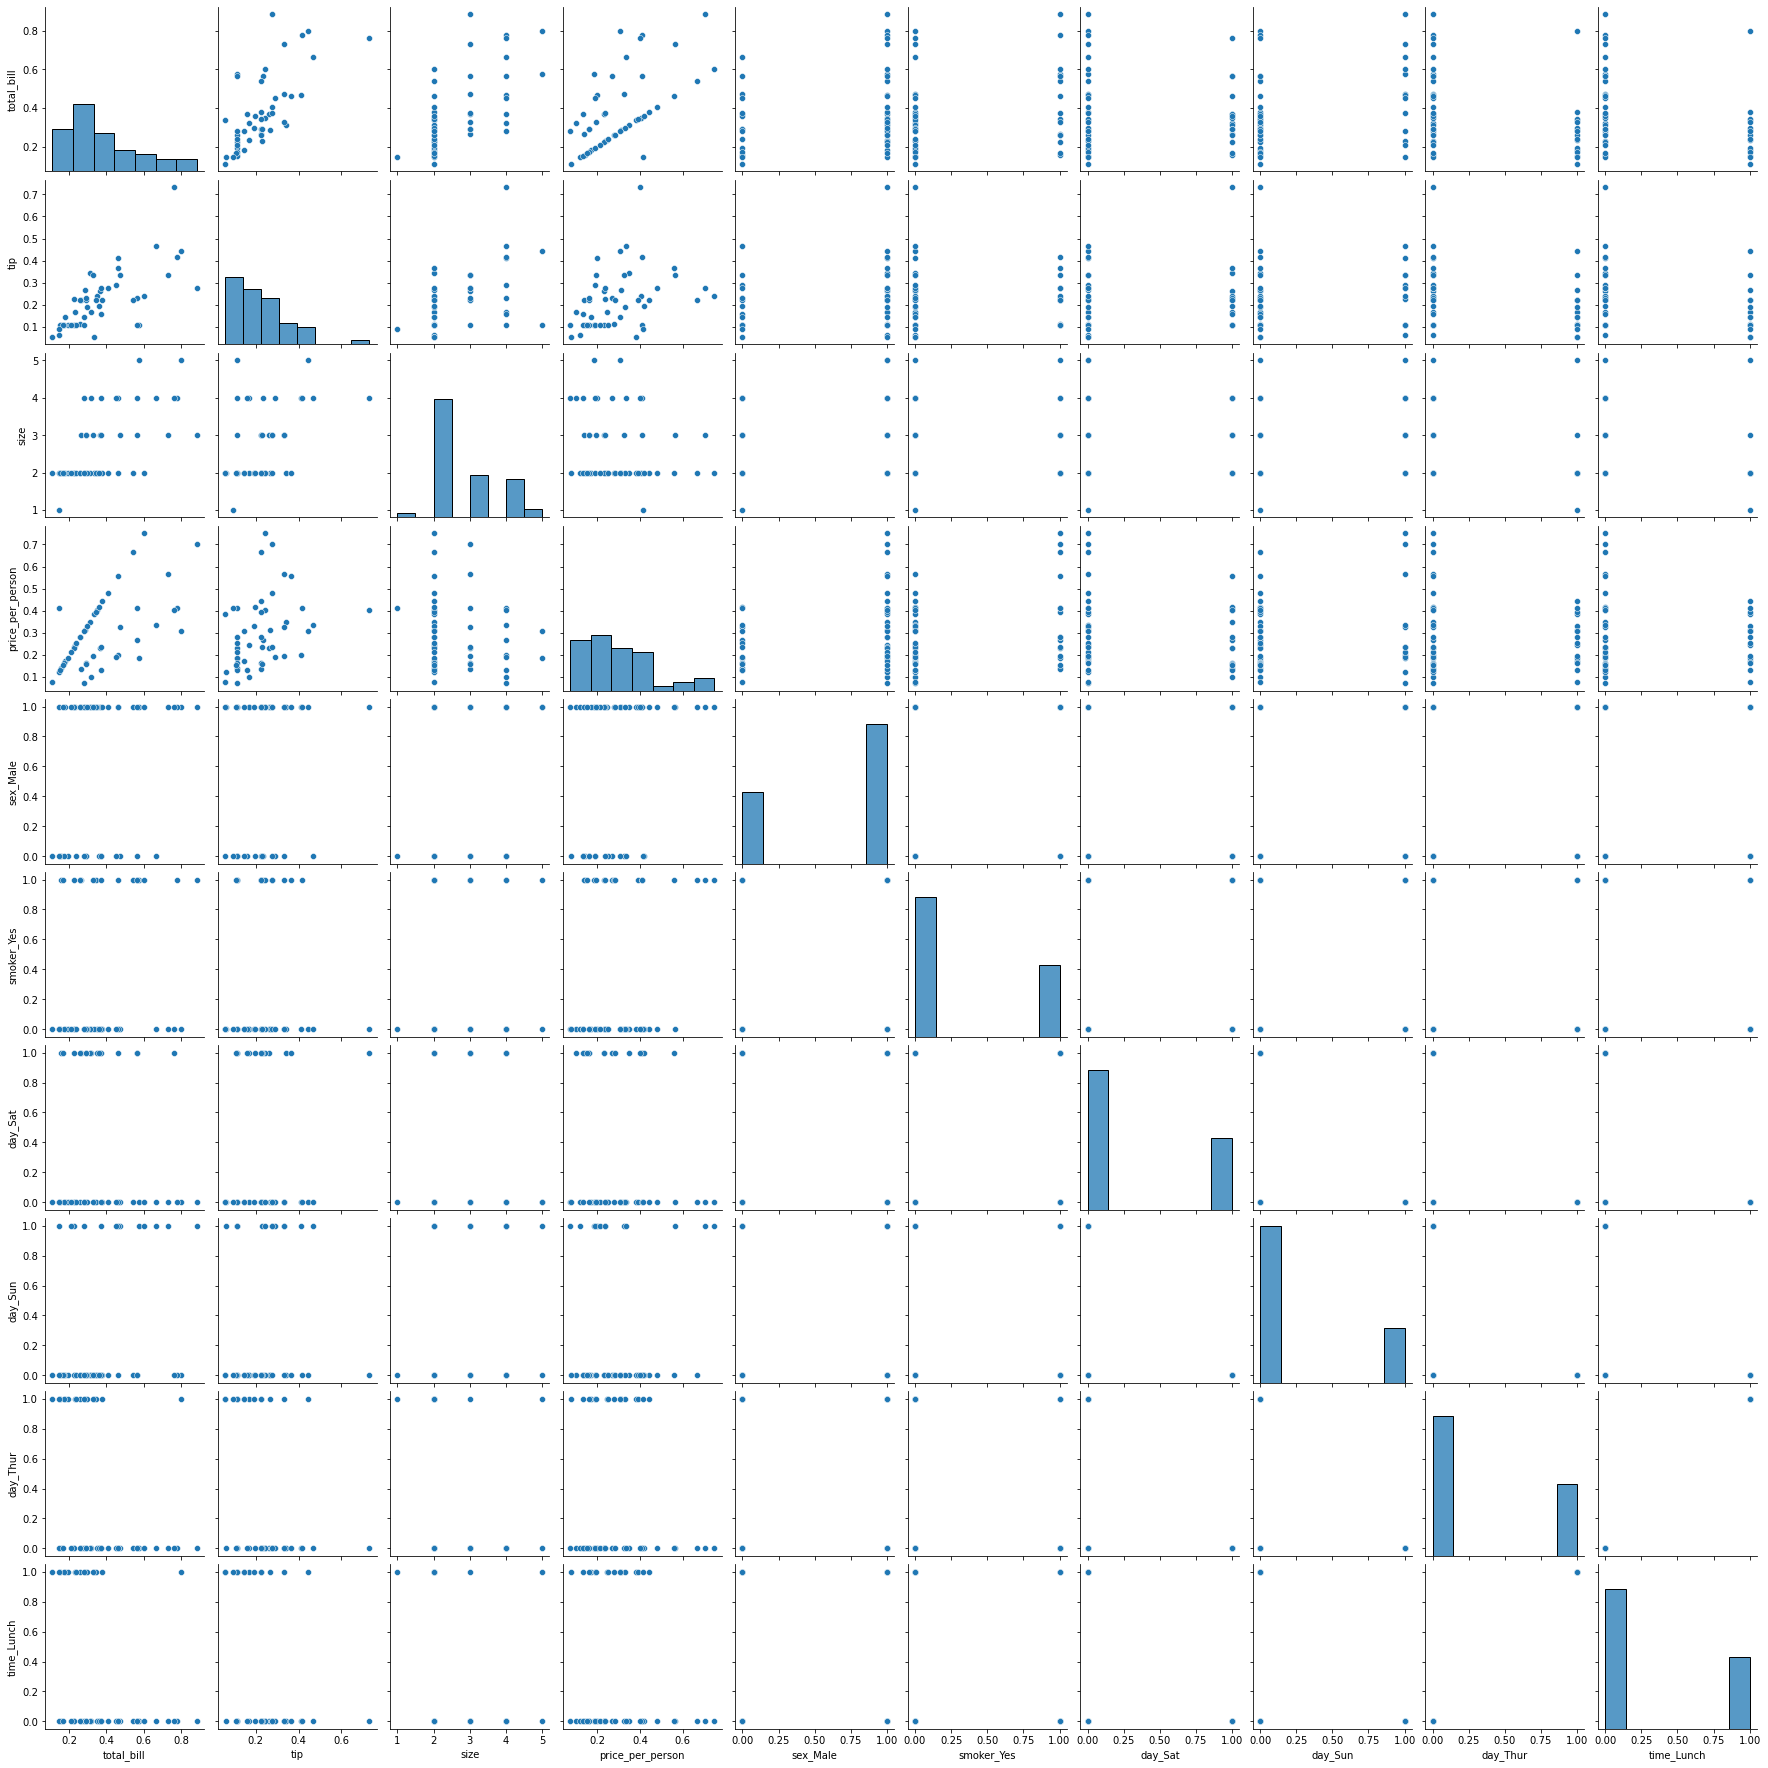

In [14]:
sns.pairplot(df.sample(50))

In [15]:
df.head()

,total_bill,tip,size,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,0.291579,0.001111,2,0.322989,0,0,0,1,0,0
2,0.152283,0.073333,3,0.032854,1,0,0,1,0,0
3,0.375786,0.277778,3,0.237261,1,0,0,1,0,0
4,0.431713,0.256667,2,0.515230,1,0,0,1,0,0
5,0.450775,0.290000,4,0.188075,0,0,0,1,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   size              244 non-null    int64  
 3   price_per_person  244 non-null    float64
 4   sex_Male          244 non-null    uint8  
 5   smoker_Yes        244 non-null    uint8  
 6   day_Sat           244 non-null    uint8  
 7   day_Sun           244 non-null    uint8  
 8   day_Thur          244 non-null    uint8  
 9   time_Lunch        244 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 11.0 KB


In [17]:
y_train=df.tip
X_train=df.drop('tip',axis=1)

In [18]:
# Like our other sklearn objects...
kbest = SelectKBest(f_regression, k=2)
kbest.fit(X_train, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x7fbcc8ab18b0>)

In [19]:
X_train_transformed = pd.DataFrame(
    kbest.transform(X_train),
    index=X_train.index,
    columns=X_train.columns[kbest.get_support()]
)
X_train_transformed.head()

,total_bill,size
1,0.291579,2.0
2,0.152283,3.0
3,0.375786,3.0
4,0.431713,2.0
5,0.450775,4.0


## d 

In [20]:
lm = LinearRegression()

In [21]:
rfe = RFE(lm, n_features_to_select=2)

In [22]:
# Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  


In [23]:
X_train_transformed = pd.DataFrame(
    rfe.transform(X_train),
    index=X_train.index,
    columns=X_train.columns[rfe.support_]
)
X_train_transformed.head()

,total_bill,price_per_person
1,0.291579,0.322989
2,0.152283,0.032854
3,0.375786,0.237261
4,0.431713,0.515230
5,0.450775,0.188075


## e

Why do you think select k best and recursive feature elimination might give different answers for the top features?
- because k best doesnt take into account how the new feature interacts with the first [0:-1] features.

Does this change as you change the number of features your are selecting?
- yes, k=3 and n=3 for k-best and recursive, respectively had two features the same but k selected size and n selected is_sat as the third features, respectively.

🔜

# 2

In [24]:
def select_kbest(X, y, k):
    kbest = SelectKBest(k=k)
    kbest.fit(X, y)
    mask = kbest.get_support()
    return X.columns[mask]

In [25]:
select_kbest(X_train, y_train,2)

Index(['total_bill', 'size'], dtype='object')

# 3

In [26]:
def rfe(X, y, k, model=LinearRegression()):
    rfe = RFE(model, n_features_to_select=k)
    rfe.fit(X, y)
    mask = rfe.get_support()
    return X.columns[mask]

In [27]:
rfe(X_train, y_train,2)

Index(['total_bill', 'price_per_person'], dtype='object')

# 4

MVP - Thanks Zach =)

In [29]:
swiss = data('swiss')
train_validate, test = train_test_split(swiss, random_state=123, test_size=.2)
train, validate = train_test_split(train_validate, random_state=123, test_size=.2)

print(f'train: {train.shape[0]} | validate: {validate.shape[0]} | test: {test.shape[0]}')

train: 29 | validate: 8 | test: 10


In [30]:
X_train = train.drop(columns='Fertility')
y_train = train.Fertility

In [31]:
select_kbest(X_train, y_train, 3)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


Index(['Education', 'Catholic', 'Infant.Mortality'], dtype='object')

In [32]:
rfe(X_train, y_train, 3)

Index(['Examination', 'Education', 'Infant.Mortality'], dtype='object')